In [1]:
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

--2024-10-17 14:31:22--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 2606:4700:3030::ac43:d5a6, 2606:4700:3031::6815:17d2, 104.21.23.210, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|2606:4700:3030::ac43:d5a6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3,3M) [text/csv]
Saving to: 'AirlineTweets.csv'

     0K .......... .......... .......... .......... ..........  1%  999K 3s
    50K .......... .......... .......... .......... ..........  2% 1,99M 2s
   100K .......... .......... .......... .......... ..........  4% 1,48M 2s
   150K .......... .......... .......... .......... ..........  5% 2,63M 2s
   200K .......... .......... .......... .......... ..........  7% 3,22M 2s
   250K .......... .......... .......... .......... ..........  8% 4,17M 2s
   300K .......... .......... .......... .......... .......... 10% 5,05M 1s
   350K .......... .......... .......... .......... 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

<Axes: >

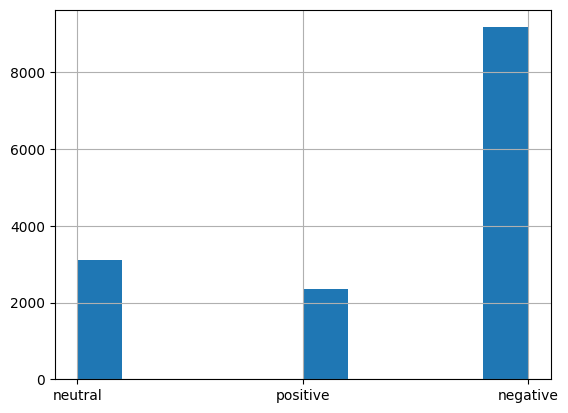

In [3]:
np.random.seed(0)
tf.random.set_seed(0)

df = pd.read_csv('AirlineTweets.csv')
df.head()
df['airline_sentiment'].hist()

In [4]:
df = df[df['airline_sentiment'] != 'neutral'].copy()
target_map = {'positive': 1, 'negative':0 }
df['target'] = df['airline_sentiment'].map(target_map)
df_copy = df[['text', 'target']].copy()
df_copy.head() 

,text,target
1,@VirginAmerica plus you've added commercials t...,1
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0
5,@VirginAmerica seriously would pay $30 a fligh...,0
6,"@VirginAmerica yes, nearly every time I fly VX...",1


In [5]:
df_train,df_test = train_test_split(df_copy,random_state=42)

vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(df_train['text'])
X_test = vectorizer.transform(df_test['text'])

# Data must not be in sparse matrix before passing to tf
X_train = X_train.toarray()
X_test =X_test.toarray()

Y_train = df_train['target']
Y_test = df_test['target']

# Input dimensions
D = X_train.shape[1]

In [30]:
# Build model
i = Input(shape=(D,))
x = Dense(300, activation='relu')(i)
output = Dense(1)(x) # sigmoid included in loss, Dense  ==  w^T * x + b

model = Model(i,output)
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 2000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 300)            │       600,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           301 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 600,601 (2.29 MB)

 Trainable params: 600,601 (2.29 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(
    loss = BinaryCrossentropy(from_logits=True),
    optimizer = Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

r = model.fit(
    X_train,Y_train,
    validation_data = (X_test,Y_test),
    epochs = 10,
    batch_size = 128
)

Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7990 - loss: 0.5520 - val_accuracy: 0.8205 - val_loss: 0.3300
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8480 - loss: 0.2807 - val_accuracy: 0.9161 - val_loss: 0.2051
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9338 - loss: 0.1613 - val_accuracy: 0.9238 - val_loss: 0.1842
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9522 - loss: 0.1205 - val_accuracy: 0.9269 - val_loss: 0.1865
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9606 - loss: 0.0989 - val_accuracy: 0.9245 - val_loss: 0.1953
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9679 - loss: 0.0843 - val_accuracy: 0.9224 - val_loss: 0.2066
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9728 - loss: 0.0731 - val_accuracy: 0.9224 - val_loss: 0.2190
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9765 - loss: 0.0640 - val_accuracy: 0.9224 - val_loss

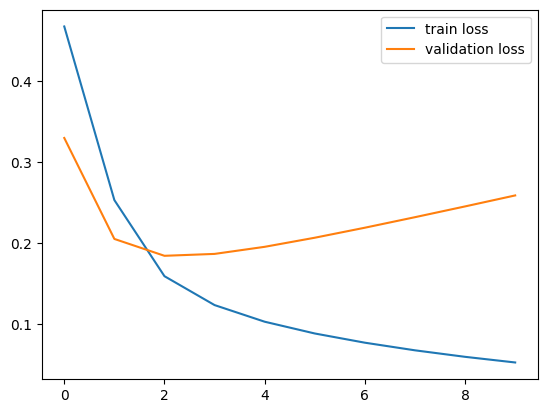

In [32]:
# plot loss per iteration

plt.plot(r.history['loss'],label = "train loss")
plt.plot(r.history['val_loss'],label = "validation loss")
plt.legend()

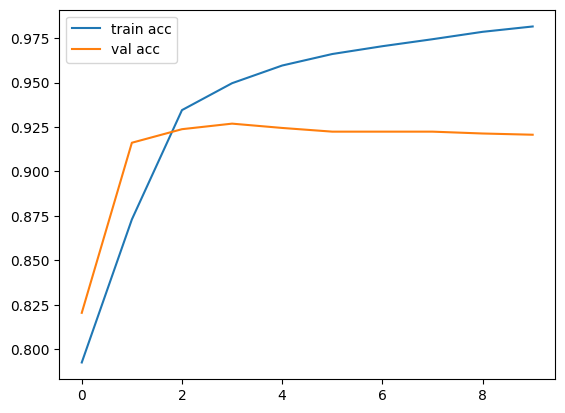

In [33]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'],label = "train acc")
plt.plot(r.history['val_accuracy'],label = "val acc")
plt.legend()

In [34]:
P_train = ((model.predict(X_train) >0) *1.0).flatten()
P_test = ((model.predict(X_test) >0) *1.0).flatten()

cm = confusion_matrix(Y_train,P_train,normalize='true')
cm


271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.99693654, 0.00306346],
       [0.03777778, 0.96222222]])

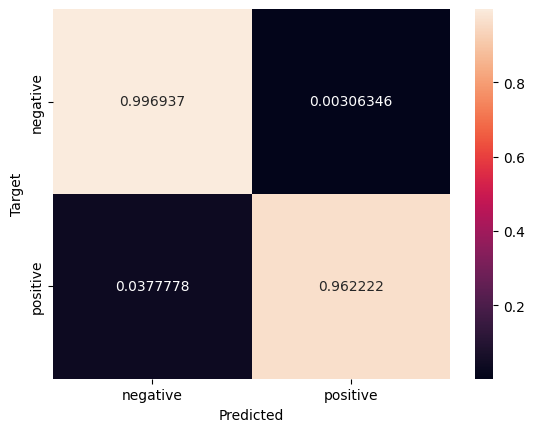

In [36]:
# plot cm
def plot_cm(cm):
    classes = ['negative','positive']
    df_cm = pd.DataFrame(cm,index=classes, columns=classes)
    ax = sn.heatmap(df_cm,annot=True,fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")

plot_cm(cm)

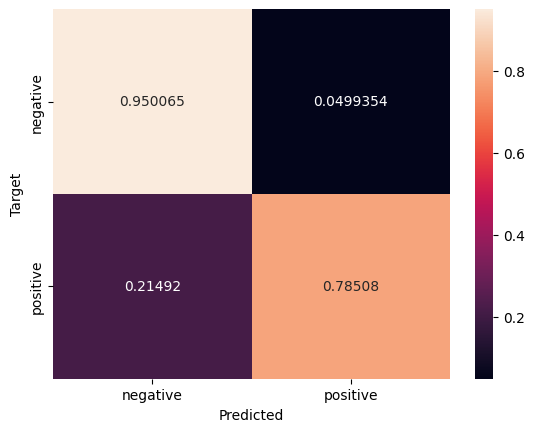

In [12]:
cm_test = confusion_matrix(Y_test,P_test,normalize='true')
plot_cm(cm_test)

In [13]:
Pr_train = model.predict(X_train)
Pr_test = model.predict(X_test)
print(f"Train AUC {roc_auc_score(Y_train,Pr_train)}")
print(f"Test AUC {roc_auc_score(Y_test,Pr_test)}")

271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train AUC 0.9999969203339006
Test AUC 0.9422777400143287


In [14]:
print(f"Train F1 {f1_score(Y_train,P_train)}")
print(f"Test F1 {f1_score(Y_test,P_test)}")

Train F1 0.9983342587451416
Test F1 0.7885816235504014


In [15]:
model.layers

[<InputLayer name=input_layer, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>]

In [16]:
w = model.layers[1].get_weights()
word_index_map = vectorizer.vocabulary_

# check weights for each word
threshold = 2
word_weight_tuples = []

for word, index in word_index_map.items():
    weight = w[0][index]
    if weight > threshold:
        word_weight_tuples.append((word,weight))

word_weight_tuples = sorted(word_weight_tuples, key = lambda x: -x[1])

# print top 10
for i in range(10):
    word,weight = word_weight_tuples[i]    
    print(word,weight)
        

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [63]:
word_weight_tuples = []

for word, index in word_index_map.items():
    weight = w[0][index]
    if weight <- threshold:
        word_weight_tuples.append((word,weight))

word_weight_tuples = sorted(word_weight_tuples, key = lambda x: x[1])

# print top 10
for i in range(10):
    word,weight = word_weight_tuples[i]    
    print(word,weight)

worst [-9.317799]
paid [-7.92855]
not [-7.773536]
rude [-7.504967]
disappointed [-7.0032444]
nothing [-6.8924623]
website [-6.8019037]
hung [-6.7201843]
instead [-6.4947352]
weren [-6.2647552]
